# Import Library

In [36]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

# Load datasets

In [92]:
train_df=pd.read_csv('train.csv')

# View Data

In [93]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [73]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Identify null values

In [74]:
train_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

# View House Distribution

C:\Users\kagis\AppData\Local\Temp\ipykernel_17136\231094707.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


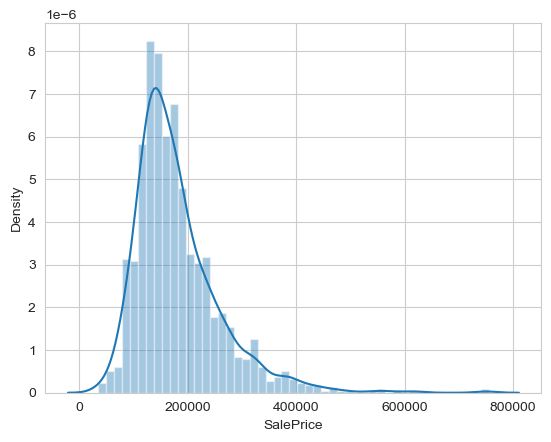

C:\Users\kagis\AppData\Local\Temp\ipykernel_17136\231094707.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


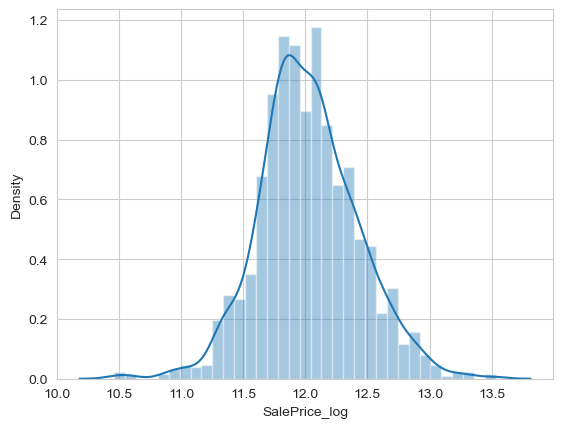

In [76]:
x=train_df.SalePrice
sns.set_style('whitegrid')
sns.distplot(x)
plt.show()

#normailse distribution
train_df['SalePrice_log'] = np.log(train_df.SalePrice)
x = train_df.SalePrice_log
sns.distplot(x)
plt.show()

# Check data correlation

C:\Users\kagis\AppData\Local\Temp\ipykernel_17136\2500683048.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr())


<Axes: >

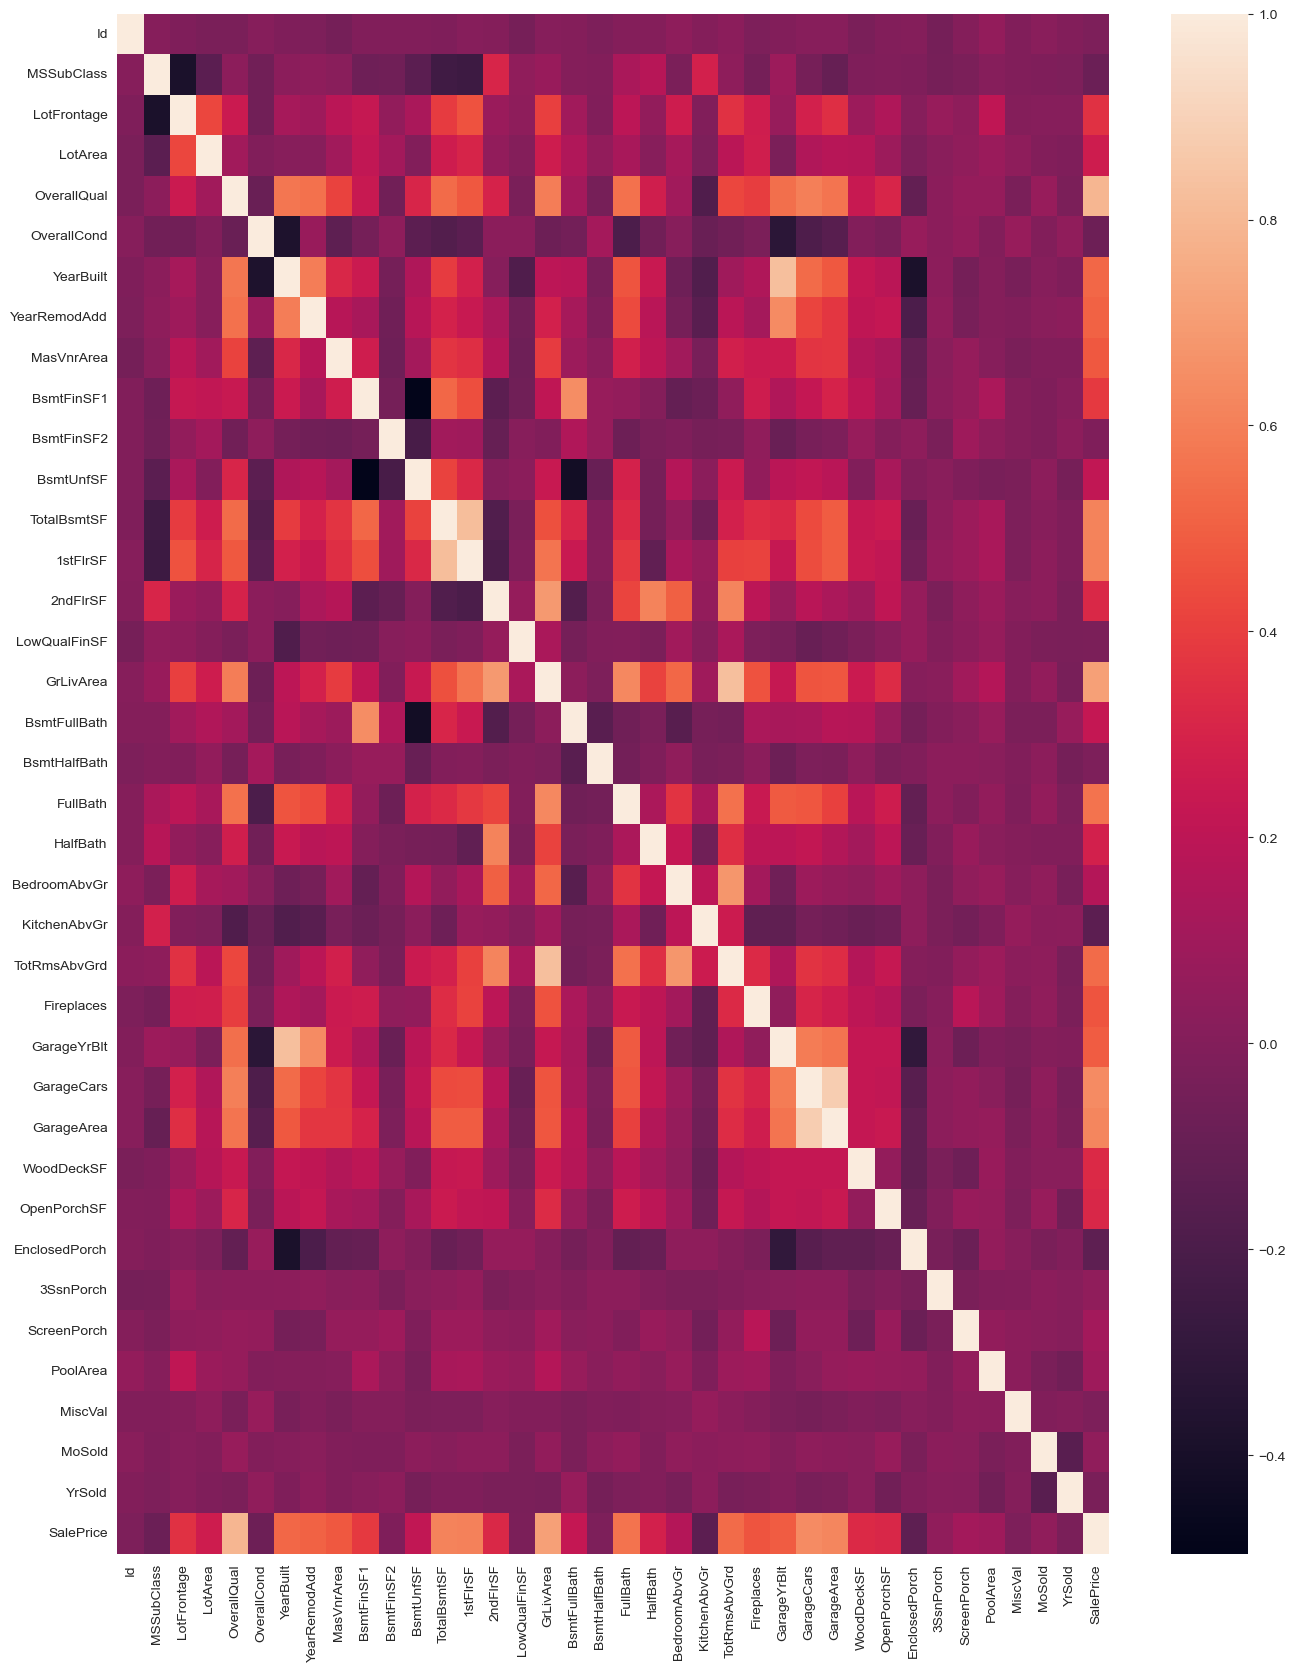

In [96]:
plt.figure(figsize=(16,20))
sns.heatmap(train_df.corr())

# View data represented in each column 

In [78]:
list(set(train_df.dtypes.tolist())) # identify datatypes


[dtype('float64'), dtype('O'), dtype('int64')]

In [95]:
df_num = train_df.select_dtypes(include = ['float64', 'int64']) # number columns present

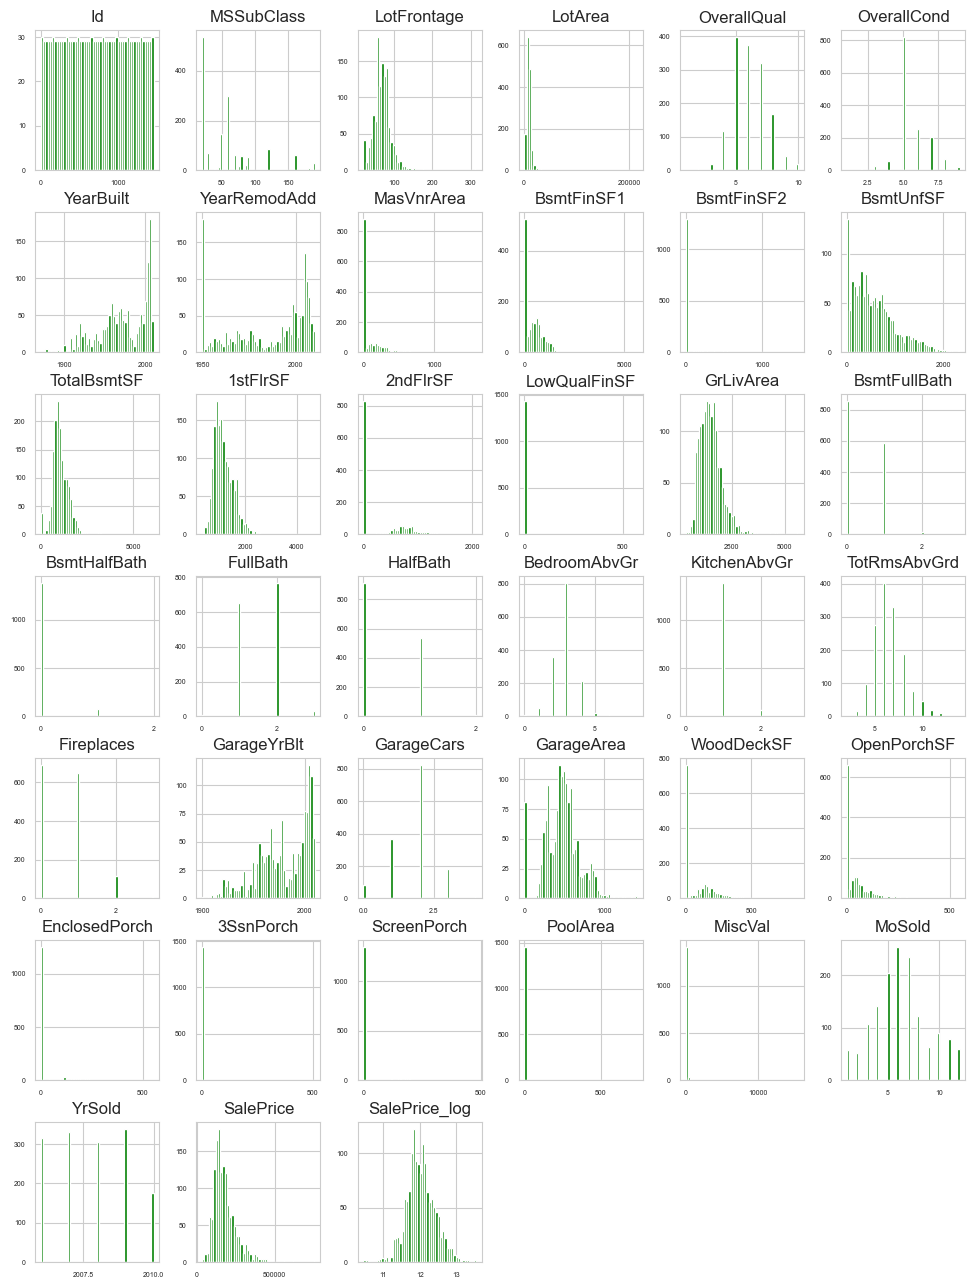

In [94]:
df_num.hist(figsize=(12, 16), bins=50, xlabelsize=5, ylabelsize=5, color='g'); # grapph columns


#  Label encoding & One-hot encoding

In [117]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

def encoding_data(data): #function converts string coloumns into integer coloumns  
    
    # Calculate the percentage of null values in each column
    null_percentages = data.isnull().mean()

    # Drop columns with null percentage greater than 50%
    data_df = data.loc[:, null_percentages < 0.5]
    
    # Select object columns
    cols = data.select_dtypes(include=['object']).columns

    # Encode the selected columns using LabelEncoder
    le = LabelEncoder()
    encoded_cols = data[cols].apply(le.fit_transform)
    
   
    
    # Drop the original categorical columns
    data = data.drop(cols, axis=1)

    # Add the encoded columns to the original DataFrame
    data = data.join(encoded_cols)
    
    data["LotFrontage"] = data["LotFrontage"].fillna(data["LotFrontage"].median())
    data["GarageYrBlt"] = data["GarageYrBlt"].fillna(data["GarageYrBlt"].median())
    data["MasVnrArea"] = data["MasVnrArea"].fillna(data["MasVnrArea"].median())
    
    return data

In [118]:
train_df = encoding_data(train_df)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

# Split Dataset into train data and test data

In [86]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

# Scale numerical variables using standardization

In [87]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object and fit it to the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Transform the training and test data using the scaler
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

print("Normalized training data:", X_train_norm)
print("Normalized test data:", X_test_norm)

Normalized training data: [[-1.11928402 -0.8667643  -0.00419319 ...  0.19729838  0.31666197
   0.20177167]
 [ 0.79046412  0.07410996 -0.49395768 ...  0.19729838  0.31666197
   0.20177167]
 [-0.21615189 -0.63154574 -0.13776532 ...  0.19729838  0.31666197
   0.20177167]
 ...
 [ 1.32669882 -0.8667643  -0.44943363 ...  0.19729838  0.31666197
   0.20177167]
 [ 0.30597137 -0.16110861 -0.67205386 ...  0.19729838  0.31666197
   0.20177167]
 [ 0.93157852  1.48542135 -0.76110194 ...  0.19729838  0.31666197
   0.20177167]]
Normalized test data: [[ 0.38123238 -0.8667643  -0.00419319 ...  0.19729838  0.31666197
   0.20177167]
 [ 0.88218848  0.07410996  1.24248005 ...  0.19729838  0.31666197
   0.20177167]
 [-0.74533088 -0.63154574 -0.62752981 ...  0.19729838  0.31666197
   0.20177167]
 ...
 [ 0.16956079  0.07410996 -0.3158615  ...  0.19729838  0.31666197
   0.20177167]
 [-0.18557711  0.30932853 -0.44943363 ...  0.19729838  0.31666197
   0.20177167]
 [-0.01859174 -0.8667643  -0.00419319 ...  0.19729

# Train model

In [119]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train, y_train) 

LinearRegression()

In [120]:
X_test

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
892,893,20,70.0,8414,6,8,1963,2003,0.0,663,...,1,1,4,4,2,3,2,4,8,4
1105,1106,60,98.0,12256,8,5,1994,1995,362.0,1032,...,1,1,4,4,2,3,4,4,8,4
413,414,30,56.0,8960,5,6,1927,1950,0.0,0,...,5,2,4,4,2,3,4,4,8,4
522,523,50,50.0,5000,6,7,1947,1950,0.0,399,...,5,2,4,4,2,3,4,4,8,4
1036,1037,20,89.0,12898,9,5,2007,2008,70.0,1022,...,1,0,4,4,2,3,4,4,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479,480,30,50.0,5925,4,7,1937,2000,435.0,168,...,5,2,4,4,2,3,2,4,8,2
1361,1362,20,124.0,16158,7,5,2005,2005,16.0,1274,...,1,0,4,4,2,3,4,4,8,4
802,803,60,63.0,8199,7,5,2005,2005,0.0,648,...,1,0,4,4,2,3,4,4,8,4
651,652,70,60.0,9084,4,5,1940,1950,0.0,0,...,5,2,1,3,1,3,2,4,8,4


In [121]:
r_sq = model.score(X_train, y_train) # the predictor x and regressor y return value is 𝑅².
print('coefficient of determination:', r_sq)

coefficient of determination: 0.9487539790442672


In [122]:
print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: -2125330.276901393
slope: [-1.02602640e+00 -6.74598863e+01 -6.92703570e+01  1.39592013e-01
 -1.47028999e+03 -1.98721336e+03 -7.27137535e+01 -1.35882571e+02
  2.57423860e+01  4.42046044e+00 -2.90421918e+00 -4.04169514e+00
 -2.52545443e+00  1.13532959e+01  1.27673993e+01 -2.65393889e+01
 -2.41869275e+00 -3.55105975e+03 -6.24510263e+03 -2.58224359e+03
 -3.64287829e+03 -4.67040232e+03 -5.50681516e+03  1.67310605e+03
 -1.07474184e+03  1.02671993e+02 -6.24862027e+01 -6.23615241e+00
  1.98312107e+00  4.22365998e+00 -2.81902134e+01  1.08044762e+00
 -3.31527850e+00 -1.86762257e+02 -4.60372962e-01 -2.56763423e+02
  3.01592436e+02  1.81440780e+05  3.16680577e+03  1.06173898e+04
  3.95100164e+03 -3.50374565e+01  8.64177607e+02 -1.75088067e+04
  3.30582193e+02  1.87661566e+03  2.23167159e+02 -1.14629583e+03
 -3.27146458e+03 -1.36859321e+02 -2.38061145e+02  1.60933733e+03
  2.19345798e+03 -2.75527888e+02 -6.11424799e+01  2.79074501e+03
 -7.27212734e+03 -1.26420295e+03 -1.54542320e+03 -4.1

In [123]:
y_pred = model.predict(X_test)

In [124]:
print('predicted response:', y_pred, sep='\n')

predicted response:
[149338.83344574 322939.58543472 106465.34900616 167975.44484953
 314831.91666965  44077.85568654 281746.5838045  138985.45541648
  61650.73491932 138890.89691891 143940.16304939 121304.65095039
  49132.91712849 222798.56153072 179202.21211929 131252.55745427
 190290.82751096 130425.74273368 122090.23435659 237818.32862104
 148205.6722088  209008.05665315 176130.38909813 105885.50664299
 197978.69186983 162372.16149064 186750.58058674 144467.30294814
 171776.26812167 207260.09805142 126589.30968719 281421.4364354
 222849.32734335 138390.67113442 249109.91437922 136380.92038555
 133998.93649999 223142.28738227 288554.6274259   89172.47368303
  98430.54165381 218124.37523287 119266.86151824 282751.71478426
 133409.52544926 142230.09771118 111886.45201873 122287.40447182
 413861.96582367 155367.96095901 112800.35200142 208949.46904917
  97876.01203947 317892.83641092 151460.30658498 262084.88222678
 219973.99403505 194914.40790598  90557.5796579   87392.86306474
  3237

In [126]:
print(X_train.shape, y_train.shape)# identify shape of data

(1168, 81) (1168,)


In [127]:
print(len(X_train), len(y_train))

1168 1168


In [132]:
X_train = X_train.values # to convert data into a numpy array

C:\Users\kagis\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


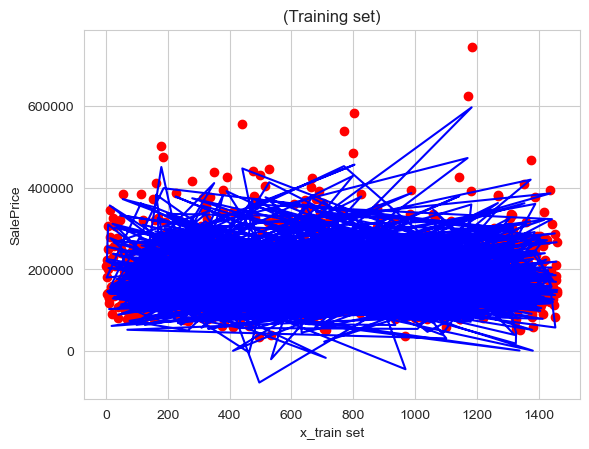

In [133]:
plt.scatter(X_train[:, 0], y_train, color = 'red')
plt.plot(X_train[:, 0], model.predict(X_train), color = 'blue') # Plot the regression line
plt.title('(Training set)')
plt.xlabel('x_train set')
plt.ylabel('SalePrice')
plt.show()

In [141]:
from sklearn import metrics

#MSE
print("MSE: "+str(metrics.mean_squared_error(y_test,y_pred)))

#RMSE
print("RMSE: "+str(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))

#R-Square
print("R-Square: "+str(metrics.r2_score(y_test,y_pred)))

MSE: 623502217.3165253
RMSE: 24970.026377970156
R-Square: 0.9187124249380292


# Bonus Model

In [88]:
from sklearn.ensemble import RandomForestRegressor
rfm = RandomForestRegressor(n_estimators=50, random_state=42)
rfm.fit(X_train_norm, y_train)
y_pred_rf = rfm.predict(X_test_norm)

In [89]:
 from sklearn.metrics import r2_score
 from sklearn.metrics import mean_squared_error


accuracy = r2_score(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)

 print("MSE:", mse)
print("Accuracy: %.2f" % accuracy)

MSE: 86168087.1224452
Accuracy: 0.99
